<a href="https://colab.research.google.com/github/MaicolLojano/Mineria-de-Datos/blob/main/UNIDAD2/Mineria_Datos_Notas_Maestro_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

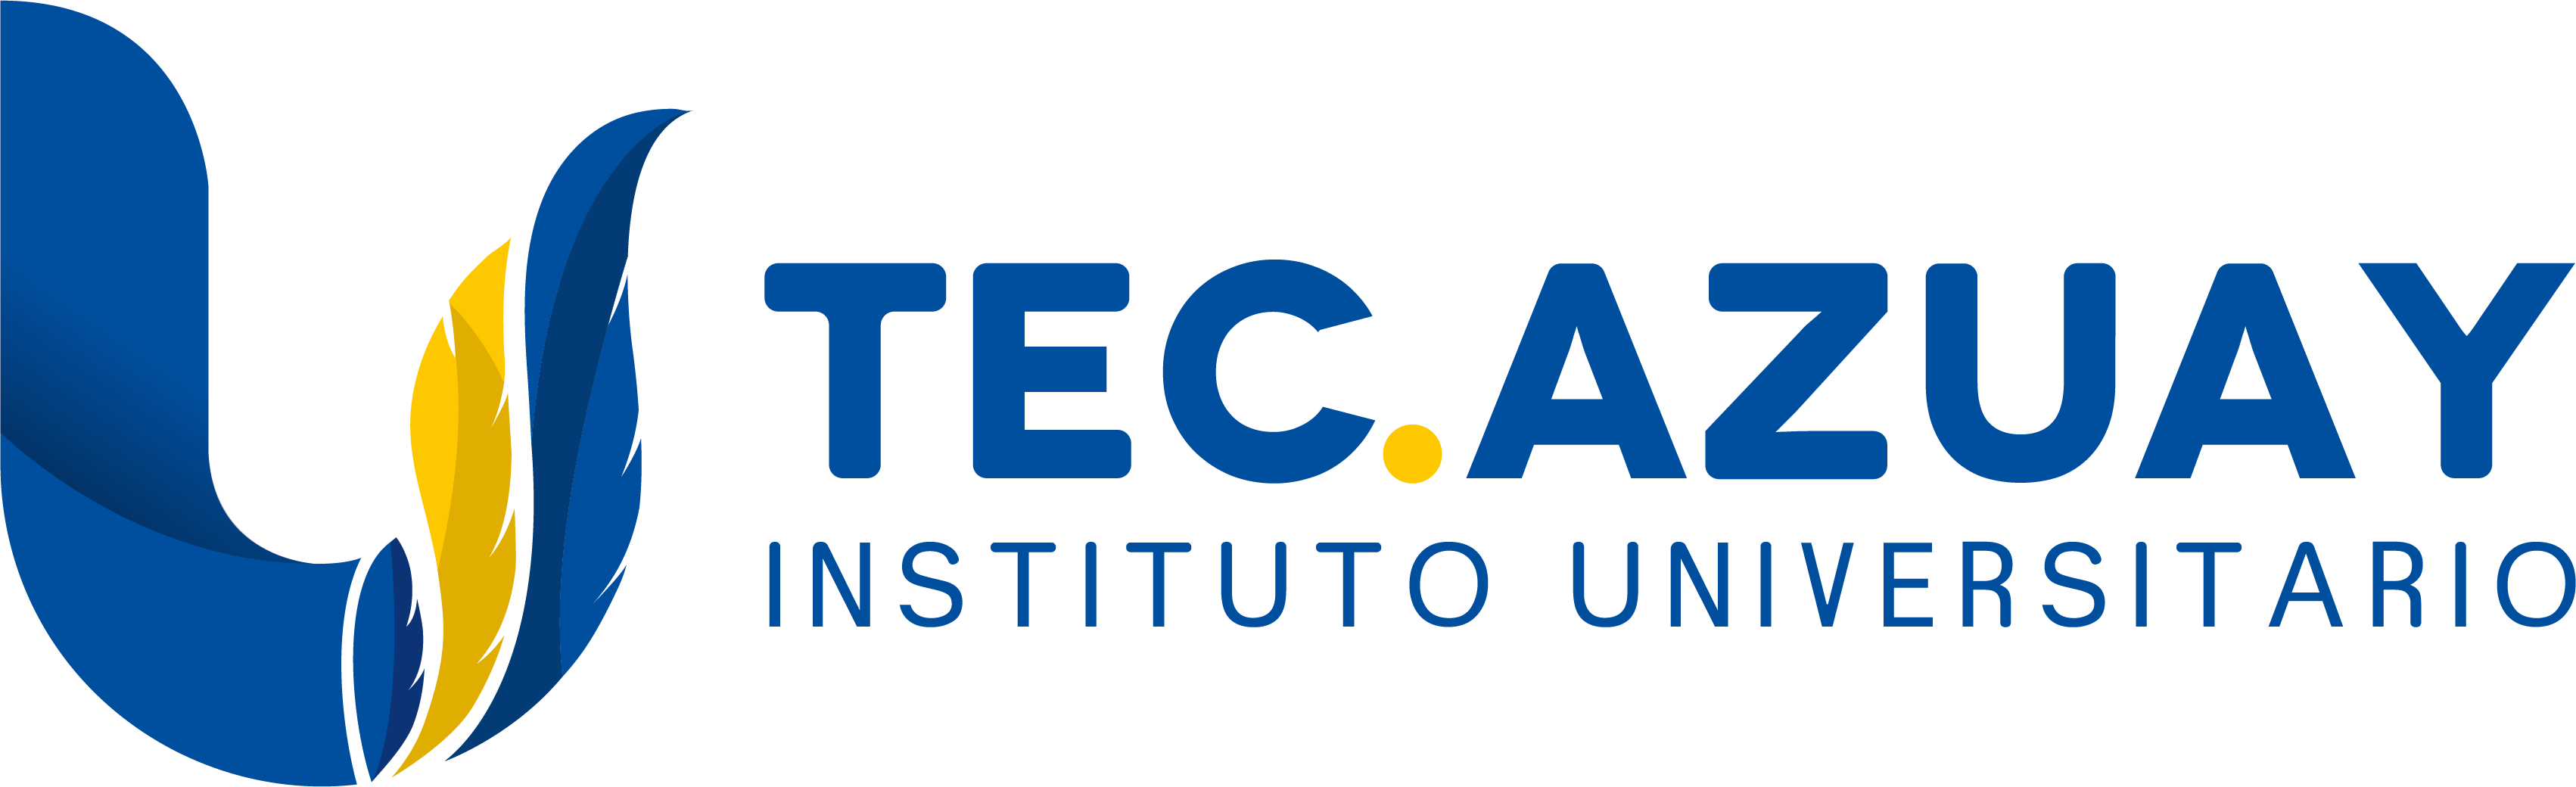

Asignatura: Mineria de datos

Nombre: Maicol Lojano

Docente: Ing. Veronica Chimbo


# ANÁLISIS DE DATOS

# 1. Cargamos la data
.

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/MAESTRO DE NOTAS.csv')
df.head()

,Periodo,Paralelo,Identificacion,Estudiante,Carrera,Nivel,Asignatura,Num_matricula,Unnamed: 8,Asistencia,Nota final,Estado,Unnamed: 12,Estado Matrícula,Tipo Ingreso,Cédula docente,Nombre docente
0,2023-2P,A_MATUTINA,1750959585,AGUALONGO GUANOTAXI LIDA GERMANIA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR-114-COMUNICACIÓN ORAL Y ESCRITA,1,NaN,93.75,8.59,APROBADO,NaN,APROBADO,NORMAL,103002036.0,ANA BEATRIZ PIEDRA MARTINEZ
1,2023-2P,A_MATUTINA,1750959585,AGUALONGO GUANOTAXI LIDA GERMANIA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR-111-DERECHOS HUMANOS EN EL CONTEXTO PENITE...,1,NaN,100.00,8.88,APROBADO,NaN,APROBADO,NORMAL,103867156.0,CRUZ GERMANIA DIAZ HERRERA
2,2023-2P,A_MATUTINA,1750959585,AGUALONGO GUANOTAXI LIDA GERMANIA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR-113-ÉTICA PROFESIONAL Y RELACIONES HUMANAS,1,NaN,100.00,9.30,APROBADO,NaN,APROBADO,NORMAL,103867156.0,CRUZ GERMANIA DIAZ HERRERA
3,2023-2P,A_MATUTINA,1750959585,AGUALONGO GUANOTAXI LIDA GERMANIA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR_132-FASE PRÁCTICA,1,NaN,100.00,10.00,APROBADO,NaN,APROBADO,NORMAL,103867156.0,CRUZ GERMANIA DIAZ HERRERA
4,2023-2P,A_MATUTINA,1750959585,AGUALONGO GUANOTAXI LIDA GERMANIA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPRI-112-INSTRUCCIÓN PENITENCIARIA,1,NaN,100.00,9.20,APROBADO,NaN,APROBADO,NORMAL,103867156.0,CRUZ GERMANIA DIAZ HERRERA


# Preprocesamiento de datos

Eliminamos columnas que contienen información sensible, para el proceso de aplicar k-means

In [ ]:
df.columns

Index(['Periodo', 'Paralelo', 'Identificacion', 'Estudiante', 'Carrera',
       'Nivel', 'Asignatura', 'Num_matricula', 'Unnamed: 8', 'Asistencia',
       'Nota final', 'Estado', 'Unnamed: 12', 'Estado Matrícula',
       'Tipo Ingreso', 'Cédula docente', 'Nombre docente'],
      dtype='object')

In [ ]:
# Eliminamos  columnas que no vamos a necesitar o que contienen informacion sensible y actualizar el DataFrame en el lugar
df.drop(['Estudiante', 'Identificacion', 'Nombre docente', 'Unnamed: 8', 'Unnamed: 12'], axis=1, inplace=True)

Verificamos si se eliminaron correctamente las oclumnas, mostrando los nombres de columnas

In [ ]:
df.columns

Index(['Periodo', 'Paralelo', 'Carrera', 'Nivel', 'Asignatura',
       'Num_matricula', 'Asistencia', 'Nota final', 'Estado',
       'Estado Matrícula', 'Tipo Ingreso', 'Cédula docente'],
      dtype='object')

In [ ]:
df.isnull().sum()

Periodo               0
Paralelo            202
Carrera               0
Nivel                 0
Asignatura            0
Num_matricula         0
Asistencia          231
Nota final          187
Estado                0
Estado Matrícula      0
Tipo Ingreso          0
Cédula docente      202
dtype: int64

In [ ]:
# Manejar los valores faltantes en columnas numéricas
# Primero, identificamos las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [ ]:
df.isnull().sum()

Periodo               0
Paralelo            202
Carrera               0
Nivel                 0
Asignatura            0
Num_matricula         0
Asistencia            0
Nota final            0
Estado                0
Estado Matrícula      0
Tipo Ingreso          0
Cédula docente        0
dtype: int64

## 2. Análisis Descriptivo

Realizaremos un análisis descriptivo de los datos.

In [ ]:
# Estadísticas descriptivas
desc_stats = df.describe()
print(desc_stats)


       Num_matricula   Asistencia   Nota final  Cédula docente
count    6007.000000  5776.000000  5820.000000    5.805000e+03
mean        1.037789    92.818492     7.817540    1.798064e+08
std         0.208231    17.144949     2.261847    2.062330e+08
min         1.000000   -12.500000     0.000000    1.016854e+08
25%         1.000000    93.750000     7.527500    1.038672e+08
50%         1.000000   100.000000     8.280000    1.042256e+08
75%         1.000000   100.000000     9.100000    1.059756e+08
max         3.000000   100.000000    10.000000    1.105051e+09


Realizamos una analisis descriptivo a todas las columnas

In [ ]:
conteo_categorias = df['Periodo'].value_counts()

print("\nAnálisis de la variable 'Periodo':")
print(conteo_categorias)


Análisis de la variable 'Periodo':
Periodo
2023-2P    6007
Name: count, dtype: int64


In [ ]:
descripcion_Paralelo = df[['Paralelo']].describe()

print("\nAnálisis de la variable Paralelo:")
print(descripcion_Paralelo)


Análisis de la variable Paralelo:
          Paralelo
count         5805
unique          11
top     A_MATUTINA
freq          2755


In [ ]:
# Estadísticas descriptivas para la variable Ventas
descripcion_carrera = df[['Carrera']].describe()

print("\nAnálisis de la variable Carrera:")
print(descripcion_carrera)


Análisis de la variable Carrera:
                                                  Carrera
count                                                6007
unique                                                 17
top     SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...
freq                                                 1107


In [ ]:
# Estadísticas descriptivas para la variable Ventas
descripcion_nivel = df[['Nivel']].describe()

print("\nAnálisis de la variable Nivel:")
print(descripcion_nivel)


Análisis de la variable Nivel:
          Nivel
count      6007
unique        5
top     PRIMERO
freq       2787


In [ ]:
# Estadísticas descriptivas para la variable Ventas
descripcion_asigantura = df[['Asignatura']].describe()

print("\nAnálisis de la variable Asignatura:")
print(descripcion_asigantura)


Análisis de la variable Asignatura:
             Asignatura
count              6007
unique              324
top     ING01-INGLÉS A1
freq                289


In [ ]:
descripcion_matricula = df[['Num_matricula']].describe()

print("\nAnálisis de la variable Num_matricula:")
print(descripcion_matricula)


Análisis de la variable Num_matricula:
       Num_matricula
count    6007.000000
mean        1.037789
std         0.208231
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000


In [ ]:
descripcion_asistencia = df[['Asistencia']].describe()

print("\nAnálisis de la variable Asistencia:")
print(descripcion_asistencia)


Análisis de la variable Asistencia:
        Asistencia
count  5776.000000
mean     92.818492
std      17.144949
min     -12.500000
25%      93.750000
50%     100.000000
75%     100.000000
max     100.000000


In [ ]:
# Estadísticas descriptivas de cada columna
descripcion_nota_final = df[['Nota final']].describe()
print("Análisis de la variable 'Nota final':")
print(descripcion_nota_final)

Análisis de la variable 'Nota final':
        Nota final
count  5820.000000
mean      7.817540
std       2.261847
min       0.000000
25%       7.527500
50%       8.280000
75%       9.100000
max      10.000000


In [ ]:
descripcion_estado = df[['Estado']].describe()

print("\nAnálisis de la variable Estado:")
print(descripcion_estado)


Análisis de la variable Estado:
          Estado
count       6007
unique         5
top     APROBADO
freq        5275


In [ ]:
descripcion_matricula = df[['Estado Matrícula']].describe()

print("\nAnálisis de la variable Estado Matrícula:")
print(descripcion_matricula)


Análisis de la variable Estado Matrícula:
       Estado Matrícula
count              6007
unique                3
top            APROBADO
freq               4740


In [ ]:
descripcion_tipo_ingreso = df[['Tipo Ingreso']].describe()

print("\nAnálisis de la variable Estado Matrícula:")
print(descripcion_tipo_ingreso)


Análisis de la variable Estado Matrícula:
       Tipo Ingreso
count          6007
unique            2
top          NORMAL
freq           5806


In [ ]:
descripcion_id_docente = df[['Cédula docente']].describe()

print("\nAnálisis de la variable Cédula docente:")
print(descripcion_id_docente)


Análisis de la variable Cédula docente:
       Cédula docente
count    5.805000e+03
mean     1.798064e+08
std      2.062330e+08
min      1.016854e+08
25%      1.038672e+08
50%      1.042256e+08
75%      1.059756e+08
max      1.105051e+09


In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv

In [ ]:
advert_report = sv.analyze([df, "Analisis de Reporte de Notas Maestro"])

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
advert_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 3. Análisis Predictivo

Utilizaremos un modelo de regresión lineal para predecir las ventas.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Periodo           6007 non-null   object 
 1   Paralelo          5805 non-null   object 
 2   Carrera           6007 non-null   object 
 3   Nivel             6007 non-null   object 
 4   Asignatura        6007 non-null   object 
 5   Num_matricula     6007 non-null   int64  
 6   Asistencia        5776 non-null   float64
 7   Nota final        5820 non-null   float64
 8   Estado            6007 non-null   object 
 9   Estado Matrícula  6007 non-null   object 
 10  Tipo Ingreso      6007 non-null   object 
 11  Cédula docente    5805 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 563.3+ KB


Error cuadrático medio (MSE): 1.28978769674868
Coeficiente de determinación (R^2): 0.7182847946630638


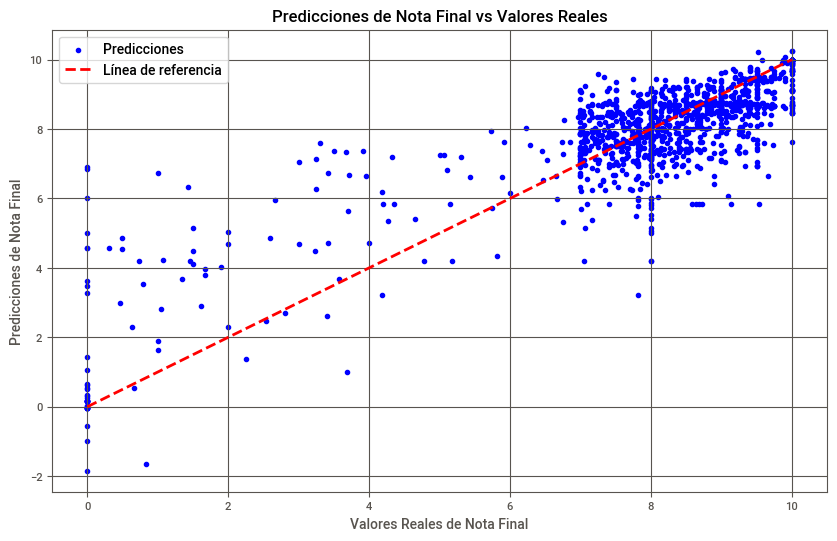

In [ ]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Seleccionar las columnas más relevantes
X = df[['Asistencia', 'Num_matricula', 'Tipo Ingreso', 'Carrera', 'Nivel', 'Asignatura', 'Cédula docente']]
y = df['Nota final']

# Convertir variables categóricas en variables dummy
X = pd.get_dummies(X, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
predicciones = model.predict(X_test)

# Calcular las métricas del modelo
mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)
print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')

# Representar de manera gráfica las predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicciones, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Línea de referencia')
plt.title('Predicciones de Nota Final vs Valores Reales')
plt.xlabel('Valores Reales de Nota Final')
plt.ylabel('Predicciones de Nota Final')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Guardar el gráfico como imagen PNG
plt.savefig('Predicciones de Nota Final vs Valores Reales')

<Figure size 640x480 with 0 Axes>

## 4. Segmentación de Datos
Realizaremos la segmentación de los datos.

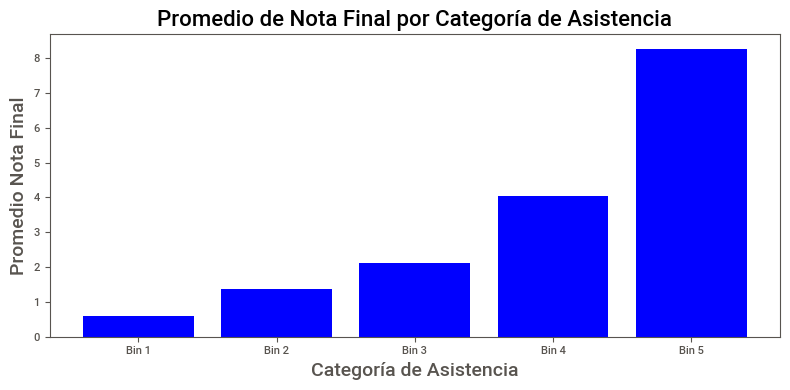

In [ ]:
import matplotlib.pyplot as plt

# Crear categorías de asistencia (ejemplo de bins)
df['Asistencia Categoría'] = pd.cut(df['Asistencia'], bins=5, labels=[f'Bin {i}' for i in range(1, 6)])

# Calcular el promedio de Nota final por categoría de asistencia
segmentos = df.groupby('Asistencia Categoría').agg({'Nota final': 'mean'}).reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(8, 4))
plt.bar(segmentos['Asistencia Categoría'], segmentos['Nota final'], color='blue')
plt.title("Promedio de Nota Final por Categoría de Asistencia", fontsize=16)
plt.xlabel("Categoría de Asistencia", fontsize=14)
plt.ylabel("Promedio Nota Final", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
# Guardar el gráfico como imagen PNG
plt.savefig('Promedio de Nota Final por Categoría de Asistencia')

<Figure size 640x480 with 0 Axes>

## 5. Optimización y Modelo de Decisiones

Realizaremos una optimización simple usando scipy.

In [ ]:
from scipy.optimize import linprog

# Definir coeficientes de la función objetivo (negativa para maximizar)
c = [-20, -15]  # Ejemplo de coeficientes
A = [[1, 1], [20, 15]]
b = [40, 500]

# Realizar la optimización
res = linprog(c, A_ub=A, b_ub=b)
print("Resultados de la optimización:", res)


Resultados de la optimización:         message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -500.00000000000006
              x: [ 0.000e+00  3.333e+01]
            nit: 1
          lower:  residual: [ 0.000e+00  3.333e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 6.667e+00  0.000e+00]
                 marginals: [-0.000e+00 -1.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


## 7. Crear la Presentación Ejecutiva

Finalmente, crearemos la presentación en PowerPoint.

In [ ]:
!pip install python-pptx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 5.9 MB/s eta 0:00:00


In [ ]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.dml.color import RGBColor
import os

# Crear presentación
prs = Presentation()

# Función para agregar un título y un subtítulo
def add_title_slide(title, subtitle):
    slide = prs.slides.add_slide(prs.slide_layouts[0])
    slide.shapes.title.text = title
    slide.placeholders[1].text = subtitle

# Diapositiva de título
add_title_slide("Análisis Académico", "Análisis completo de datos y resultados")

# Estadísticas Descriptivas
desc_stats = df.describe(include='all')  # Suponiendo que df es el DataFrame con los datos
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Estadísticas Descriptivas"
content = slide.shapes.add_textbox(Inches(0.5), Inches(1), Inches(8), Inches(5))
text_frame = content.text_frame
text_frame.text = desc_stats.to_string()

# Ajustar formato del texto
for paragraph in text_frame.paragraphs:
    paragraph.font.size = Pt(12)
    paragraph.font.color.rgb = RGBColor(0, 0, 0)  # Negro

# Gráfico de Predicciones de Nota Final vs Valores Reales
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Predicciones de Nota Final vs Valores Reales"
image_path = "/content/Predicciones de Nota Final vs Valores Reales.png"
if os.path.exists(image_path):
    slide.shapes.add_picture(image_path, Inches(0.5), Inches(1), width=Inches(8))
else:
    print(f"Advertencia: No se encontró el archivo {image_path}")

# Gráfico de Promedio de Nota Final por Categoría de Asistencia
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Promedio de Nota Final por Categoría de Asistencia"
image_path = "/content/Promedio de Nota Final por Categoría de Asistencia.png"
if os.path.exists(image_path):
    slide.shapes.add_picture(image_path, Inches(0.5), Inches(1), width=Inches(8))
else:
    print(f"Advertencia: No se encontró el archivo {image_path}")

# Conclusiones
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Conclusiones Finales"
conclusiones = (
    "1. Se observa una relación significativa entre la carrera y el estado de los estudiantes.\n"
    "2. Las predicciones de la nota final coinciden con los valores reales en muchos casos, lo que valida el modelo predictivo.\n"
    "3. El promedio de la nota final varía según la categoría de asistencia, sugiriendo que la asistencia afecta el rendimiento académico.\n"
)
content = slide.shapes.add_textbox(Inches(0.5), Inches(1), Inches(8), Inches(5))
text_frame = content.text_frame
text_frame.text = conclusiones

# Ajustar formato del texto
for paragraph in text_frame.paragraphs:
    paragraph.font.size = Pt(12)
    paragraph.font.color.rgb = RGBColor(0, 0, 0)  # Negro

# Guardar la presentación
prs.save('Presentacion_de_Notas_Maestro.pptx')


In [ ]:
#Crear la presentaciòn de los datos con Power Bi
!pip install powerbiclient

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.9/684.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.8/111.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.7 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=a407a0da41852ec3226d1d147396e2072d2219ed13b54b168b9c4915024ad851
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
# Convertir columnas categóricas a tipo object
df = df.apply(lambda x: x.astype(str) if x.dtype.name == 'category' else x)

# Llenar los valores nulos
df = df.fillna('')


In [ ]:
#Importar la librería
from powerbiclient import QuickVisualize, get_dataset_config

In [ ]:
#Autenticación en Power BI
from powerbiclient.authentication import DeviceCodeLoginAuthentication

In [ ]:
device_auth=DeviceCodeLoginAuthentication()

Performing device flow authentication. Please follow the instructions below.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code AJCDSGNFN to authenticate.

Device flow authentication successfully completed.
You are now logged in .

The result should be passed only to trusted code in your notebook.


In [ ]:
PBI_visualizacion=QuickVisualize(get_dataset_config(df), auth=device_auth)

In [ ]:
PBI_visualizacion

QuickVisualize()